In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Unzip Image and annotation

In [ ]:
!unzip "/content/drive/MyDrive/Official Folder DigitalTwins/Data/Annotated/Image_annotation_8images_batch1.zip"

Archive:  /content/drive/MyDrive/Official Folder DigitalTwins/Data/Annotated/Image_annotation_8images_batch1.zip
   creating: Image_annotation_8images_batch1/
   creating: Image_annotation_8images_batch1/classes/
  inflating: Image_annotation_8images_batch1/classes/classes.json  
  inflating: Image_annotation_8images_batch1/2001_3.png___objects.json  
  inflating: Image_annotation_8images_batch1/1414.png___objects.json  
  inflating: Image_annotation_8images_batch1/1420.png___objects.json  
  inflating: Image_annotation_8images_batch1/2001_2.png___objects.json  
  inflating: Image_annotation_8images_batch1/2201_1.png___objects.json  
  inflating: Image_annotation_8images_batch1/2001_1.png___objects.json  
  inflating: Image_annotation_8images_batch1/1422.png___objects.json  
  inflating: Image_annotation_8images_batch1/1421.png___objects.json  


In [ ]:
!unzip -d imgs "/content/drive/MyDrive/Official Folder DigitalTwins/Data/Not-Annotated/PIDs-images_200dpi.zip" 

Archive:  /content/drive/MyDrive/Official Folder DigitalTwins/Data/Not-Annotated/PIDs-images_200dpi.zip
  inflating: imgs/1414.png           
  inflating: imgs/1420.png           
  inflating: imgs/1421.png           
  inflating: imgs/1422.png           
  inflating: imgs/2001_1.png         
  inflating: imgs/2001_2.png         
  inflating: imgs/2001_3.png         
  inflating: imgs/2101.png           
  inflating: imgs/2201_1.png         
  inflating: imgs/2201_2.png         


In [ ]:
!unzip "/content/NewAnnotations.zip"

Archive:  /content/NewAnnotations.zip
   creating: NewAnnotations/
  inflating: NewAnnotations/4201.png  
  inflating: NewAnnotations/classifications.json  
  inflating: NewAnnotations/objects.json  
  inflating: NewAnnotations/.Rhistory  


# Import Library 

In [ ]:
import json
import pandas as pd
import cv2
import random
import numpy as np

# EDA

## Annotation file

In [ ]:
with open("/content/NewAnnotations/classifications.json") as f:
    anno = json.load(f)

In [ ]:
with open("/content/NewAnnotations/objects.json") as f:
    anno = json.load(f)

In [ ]:
len(anno['image_labels'][0]['objects'])

34

In [ ]:
df = pd.DataFrame(anno['image_labels'][0]['objects'])

KeyError: ignored

In [ ]:
df.name.unique()

array(['Symbol', 'Text', 'Line'], dtype=object)

In [ ]:
df.value.unique()

array(['symbol', 'text', 'line'], dtype=object)

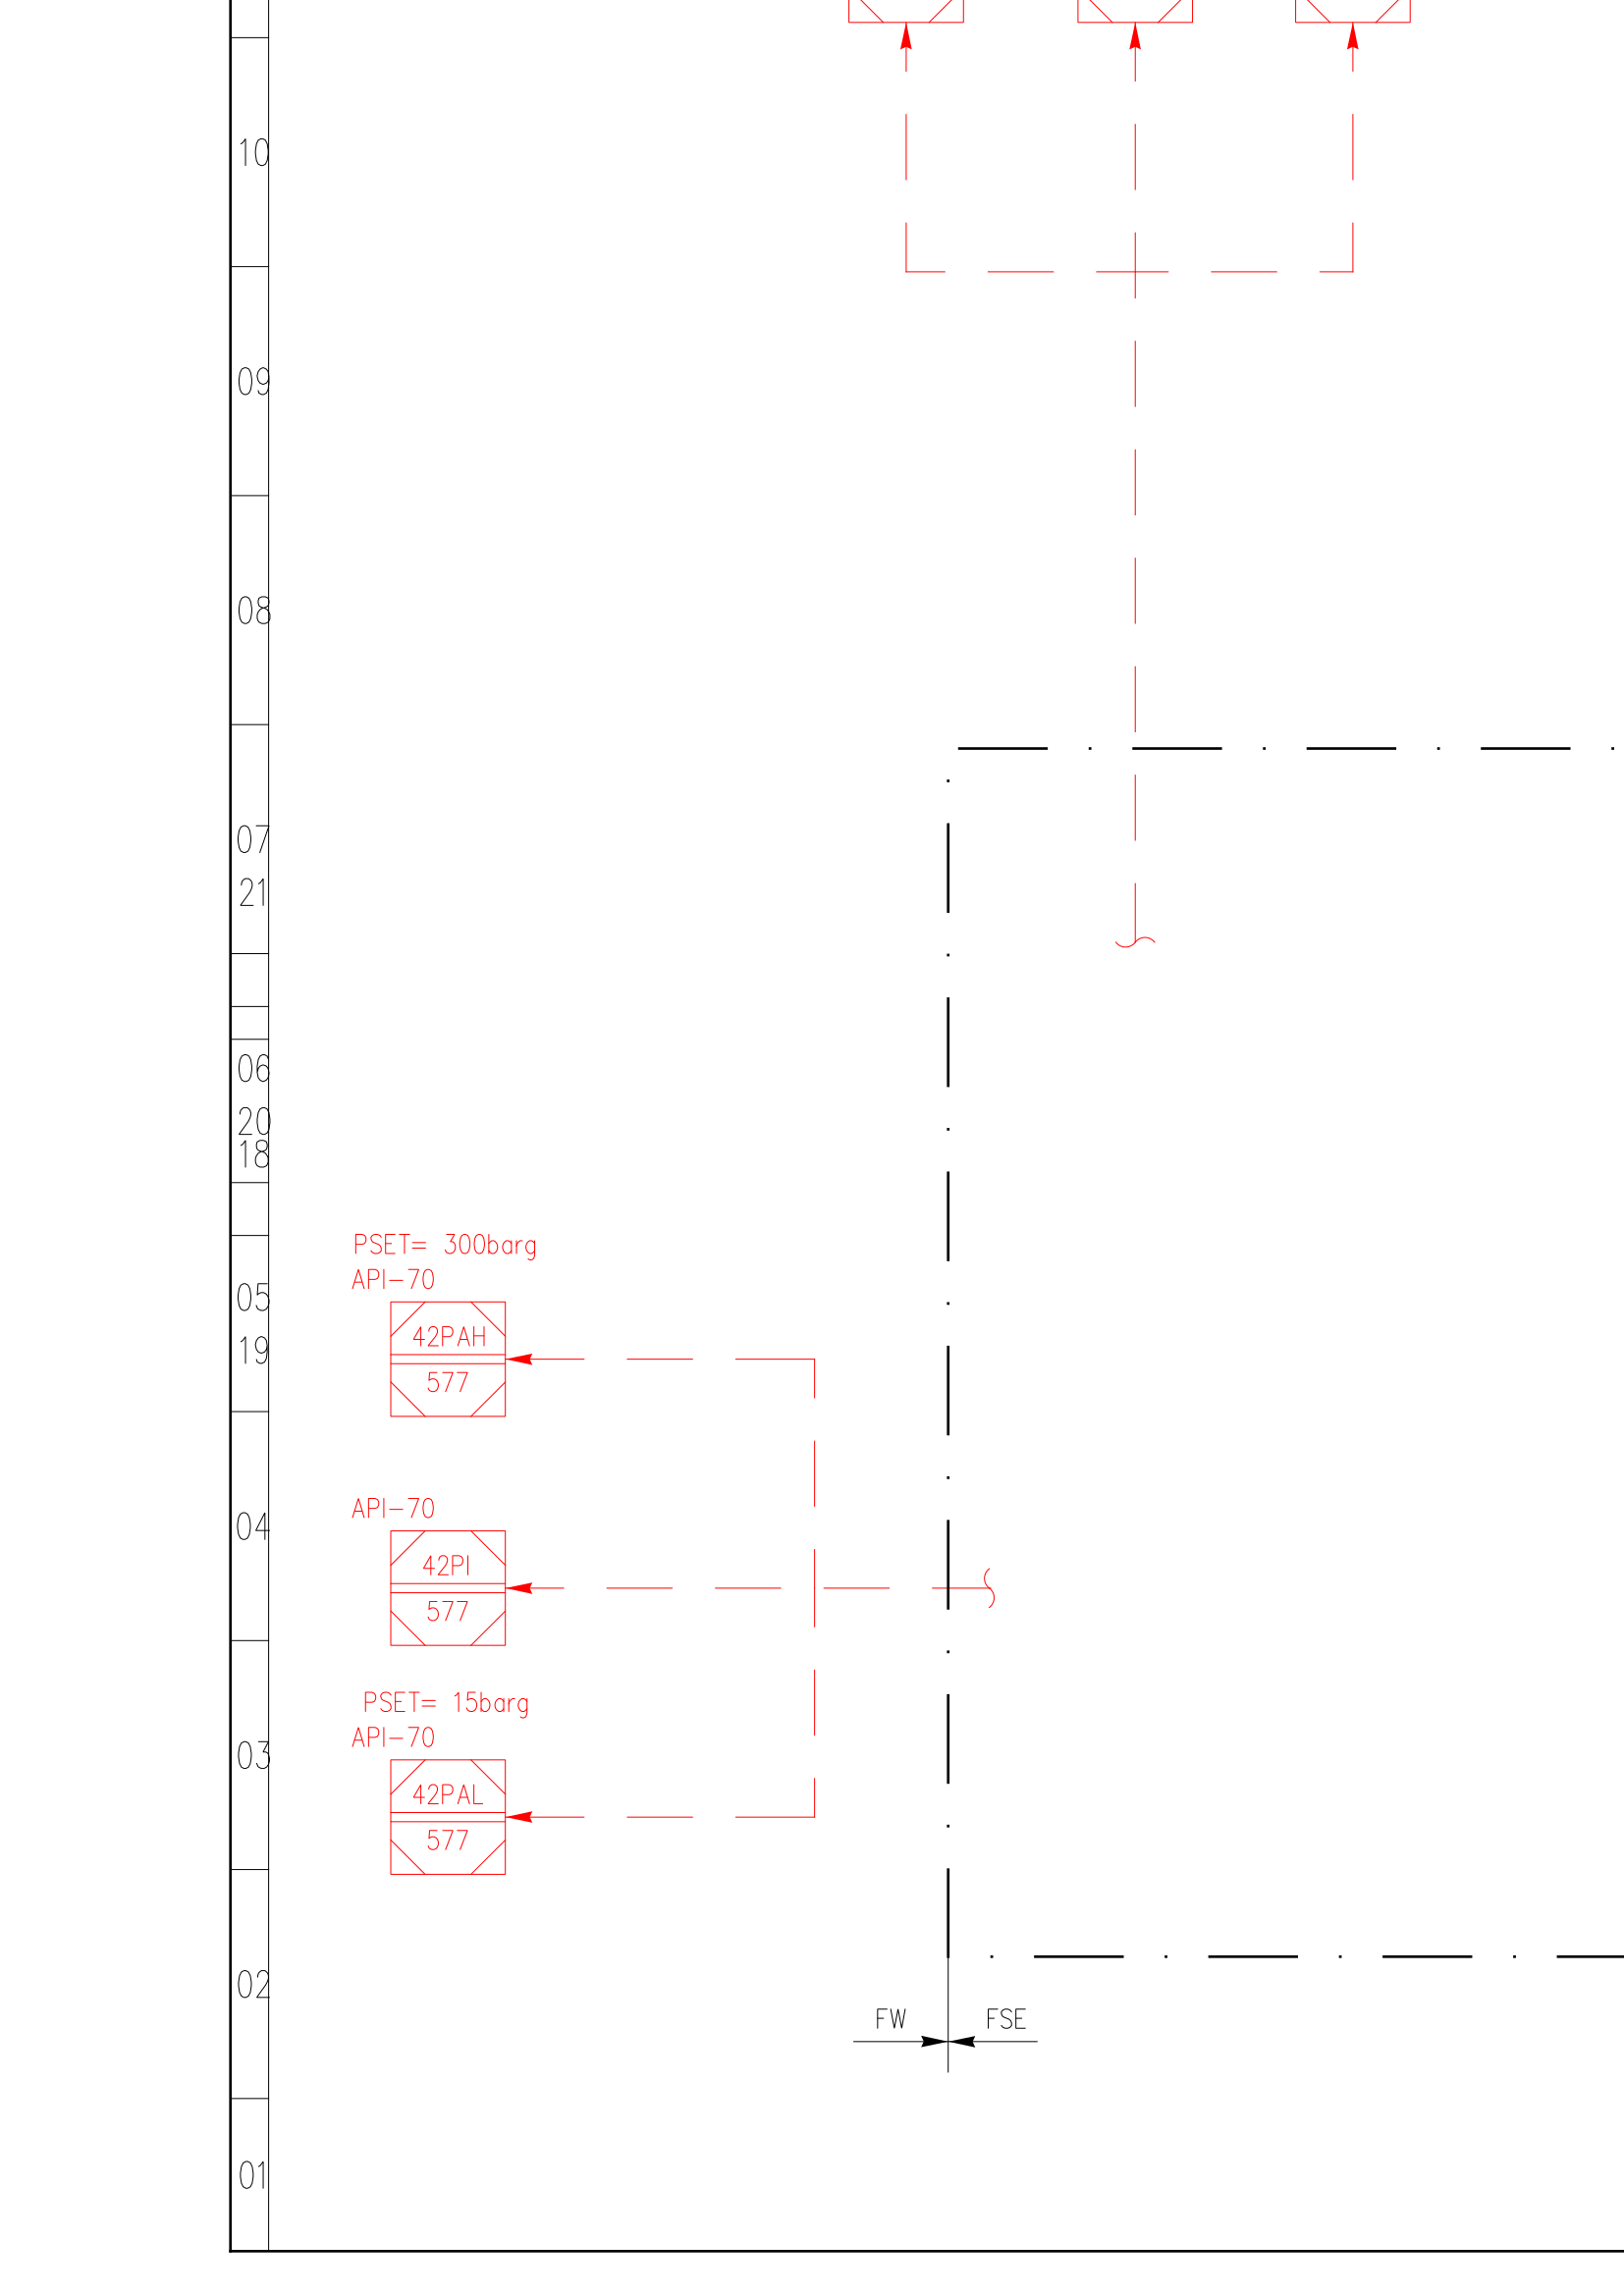

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/NewAnnotations/4201.png")
cv2_imshow(img)

In [ ]:
df.boundingBox.iloc[20]

{'h': 0.0117, 'w': 0.0165, 'x': 0.3147, 'y': 0.7861}

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   confidence        34 non-null     int64 
 1   featureHash       34 non-null     object
 2   objectHash        34 non-null     object
 3   name              34 non-null     object
 4   value             34 non-null     object
 5   color             34 non-null     object
 6   classifications   34 non-null     object
 7   createdBy         34 non-null     object
 8   createdAt         34 non-null     object
 9   lastEditedBy      17 non-null     object
 10  lastEditedAt      17 non-null     object
 11  manualAnnotation  34 non-null     bool  
 12  boundingBox       24 non-null     object
 13  skeleton          10 non-null     object
dtypes: bool(1), int64(1), object(12)
memory usage: 3.6+ KB


In [ ]:
anno.keys()

dict_keys(['label_hash', 'dataset_title', 'project_title', 'view_label_url', 'image_labels'])

In [ ]:
with open("/content/Image_annotation_8images_batch1/1414.png___objects.json") as f:
    anno = json.load(f)

In [ ]:
# Annotation format
anno.keys()

dict_keys(['metadata', 'comments', 'tags', 'instances'])

In [ ]:
# Annotation metadata
anno['metadata']

{'annotatorEmail': None,
 'height': 6622,
 'isPredicted': False,
 'lastAction': {'email': 'tusher@superannotate.ai',
  'timestamp': 1626373214961},
 'name': '1414.png',
 'pinned': False,
 'projectId': 56799,
 'qaEmail': None,
 'status': 'Completed',
 'width': 9362}

In [ ]:
# Creating DataFrame of Instances
# All data associated to give image is under Instance key.
df = pd.DataFrame(anno['instances'])

In [ ]:
df.head()

,type,classId,probability,points,groupId,pointLabels,locked,visible,attributes,trackingId,error,createdAt,createdBy,creationType,updatedAt,updatedBy,className
0,bbox,352833,100,"{'x1': 3367.56, 'x2': 3501.03, 'y1': 4275.56, ...",103,{},False,True,[],None,NaN,2021-07-13T19:48:01.324Z,"{'email': 'tusher@superannotate.ai', 'role': '...",Manual,2021-07-13T19:48:06.791Z,"{'email': 'tusher@superannotate.ai', 'role': '...",Instrument
1,bbox,352833,100,"{'x1': 3011.13, 'x2': 3139.96, 'y1': 2925.54, ...",100,{},False,True,[],None,NaN,2021-07-13T19:46:22.624Z,"{'email': 'tusher@superannotate.ai', 'role': '...",Manual,2021-07-13T19:46:36.847Z,"{'email': 'tusher@superannotate.ai', 'role': '...",Instrument
2,bbox,352833,100,"{'x1': 6386.96, 'x2': 6517, 'y1': 5902.13, 'y2...",95,{},False,True,[],None,NaN,2021-07-13T19:43:08.570Z,"{'email': 'tusher@superannotate.ai', 'role': '...",Manual,2021-07-13T19:43:08.570Z,"{'email': 'tusher@superannotate.ai', 'role': '...",Instrument
3,bbox,352833,100,"{'x1': 5650.79, 'x2': 5781.95, 'y1': 2624.14, ...",94,{},False,True,[],None,NaN,2021-07-13T19:42:25.928Z,"{'email': 'tusher@superannotate.ai', 'role': '...",Manual,2021-07-13T19:42:25.928Z,"{'email': 'tusher@superannotate.ai', 'role': '...",Instrument
4,bbox,352833,100,"{'x1': 3683.68, 'x2': 3814.63, 'y1': 2754.36, ...",93,{},False,True,[],None,NaN,2021-07-13T19:42:13.108Z,"{'email': 'tusher@superannotate.ai', 'role': '...",Manual,2021-07-13T19:42:13.108Z,"{'email': 'tusher@superannotate.ai', 'role': '...",Instrument


In [ ]:
'''
Three key rows which are important here
1. type (Type of annotations)
2. points (Coordinate points)
3. className (Class associated to given points)
'''
print("Different `type` used in data -\n", df.type.unique(), "(Total {})\n".format(len(df.type.unique())))
print("Different `className` used in data -\n", df.className.unique(), "(Total {})".format(len(df.className.unique())))

Different `type` used in data -
 ['bbox' 'polyline'] (Total 2)

Different `className` used in data -
 ['Instrument' 'tank_vessel' 'engine' 'separator' 'valve' 'flange' 'plug'
 'flange_blind' 'Concentric' 'Actuator' 'connector' 'line_break'
 'flow_direction' 'piping_lines' 'other_lines' 'Unidentified'
 'Inside text' 'text'] (Total 18)


In [ ]:
# List of all class and their count
class_count = {}
for i in df.className.unique():
    class_count[i] = (df[(df.className == i) ].className.value_counts()[0])

In [ ]:
class_count

{'Actuator': 9,
 'Concentric': 16,
 'Inside text': 228,
 'Instrument': 67,
 'Unidentified': 39,
 'connector': 5,
 'engine': 2,
 'flange': 83,
 'flange_blind': 15,
 'flow_direction': 142,
 'line_break': 57,
 'other_lines': 220,
 'piping_lines': 334,
 'plug': 9,
 'separator': 2,
 'tank_vessel': 1,
 'text': 495,
 'valve': 55}

In [ ]:
count_df = pd.DataFrame([class_count])

In [ ]:
count_df.T

,0
Instrument,67
tank_vessel,1
engine,2
separator,2
valve,55
flange,83
plug,9
flange_blind,15
Concentric,16
Actuator,9


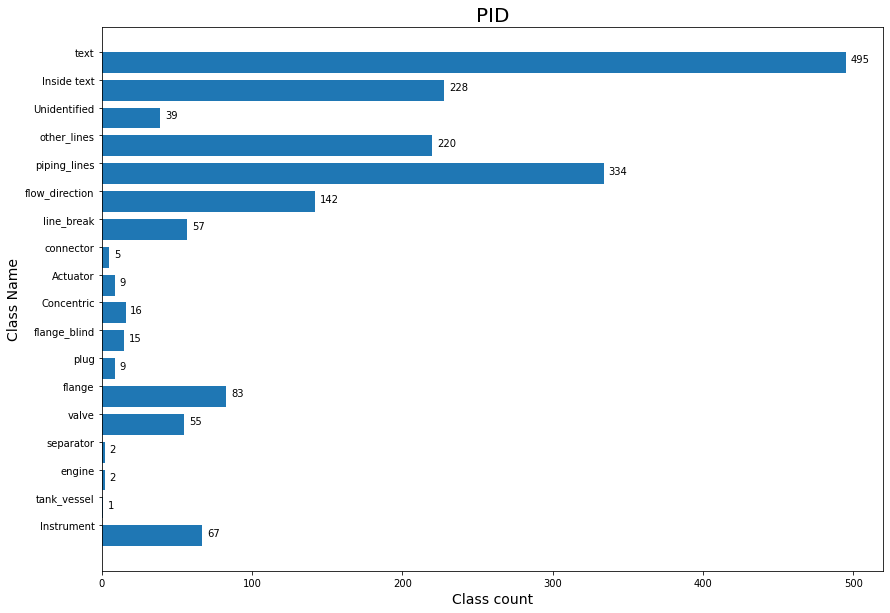

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

x = list(class_count.keys())
y = list(class_count.values())

fig, ax = plt.subplots(figsize =(14, 10))    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width)
for i, v in enumerate(y):
    ax.text(v + 3, i , str(v))
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.ylabel("Class Name", fontsize=14)
plt.xlabel("Class count", fontsize=14) 
plt.title("PID", fontsize=20)      
plt.show()

## Ploting Boundry Box and Polylines on the given Image

In [ ]:
def display_instances(image, bbox, idx):
  """ Function to display Bounding box
    Params:
        image: image (use cv2.imread(img_path))
        bbox: coordinate of give instance
        idx: simple id
    
    returns: 
        image: image with ploted Bounding box
        
    Note: bbox should be in superannotate format({"x1":.., "x2":.., ...})
  """
  x1, x2, y1, y2 = int(bbox['x1']), int(bbox['x2']), int(bbox['y1']), int(bbox['y2'])
  image = cv2.rectangle(image, (x1, y1), (x2, y2), color = (0, 0, 255), thickness =5)
  return image

In [ ]:
def plot_polyline(image, polyline_coordinate, idx):
  """ Function to display polyline 
    Params:
        image: image (use cv2.imread(img_path))
        polyline_coordinate: polyline coordinate of give instance
        idx: simple id
    
    returns: 
        image: image with ploted polyline
        
    Note: polyline_coordinate should be in superannotate format([x1, y1, x2, y2 .....])
  """

  formated_coordinate = []  # [[x1, y1], [x2, y2]....]
  pt = polyline_coordinate
  for idx in range(0, len(pt)):
    if (idx+1)%2 != 0:
      formated_coordinate.append([pt[idx], pt[idx+1]])

  pts = np.array(formated_coordinate,
                np.int32)
    
  pts = pts.reshape((-1, 1, 2))

  color = (255, 0, 0)
  isClosed = False
  thickness = 5
  image = cv2.polylines(image, [pts], isClosed, color, thickness)

In [ ]:
df.type.unique()

array(['bbox', 'polyline'], dtype=object)

In [ ]:
# List of all Annotation Type and their count
annotation_type_count = {}
for i in df.type.unique():
    annotation_type_count[i] = (df[(df.type == i) ].type.value_counts()[0])

In [ ]:
annotation_type_count

{'bbox': 1225, 'polyline': 554}

In [ ]:
# Reading Image from Drive
img = cv2.imread("/content/imgs/1414.png")

In [ ]:
# Image size
print(img.shape)

(6622, 9362, 3)


In [ ]:
# For now we are only ploting Boundary boxes
final_img = None
for idx, bbox in  enumerate(df.points):
  if (df.type.iloc[idx] == 'bbox'):
    final_img = display_instances(img, bbox, 1)
  elif (df.type.iloc[idx] == 'polyline'):
    final_img = plot_polyline(img, bbox, 1)

In [ ]:
# Showing final Image
# Bounding boxes are in Red and Polylines are in Blue
from google.colab.patches import cv2_imshow
cv2_imshow(final_img)

Output hidden; open in https://colab.research.google.com to view.